# Adults Income Prediction

## Import libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

# Set Matplotlib defaults
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [3]:
path = "adult.csv"
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
#replace ? with NaN
df.replace("?", np.nan, inplace = True )

### Checking for columns names, data types, missing values, duplicates and number of unique classes

In [6]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] =  summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
occupation,object,2809,0,2809,5.751198,52,14,46033
workclass,object,2799,0,2799,5.730724,52,8,46043
native-country,object,857,0,857,1.754637,52,41,47985
age,int64,0,0,0,0.000000,52,74,48842
fnlwgt,int64,0,0,0,0.000000,52,28523,48842
education,object,0,0,0,0.000000,52,16,48842
educational-num,int64,0,0,0,0.000000,52,16,48842
marital-status,object,0,0,0,0.000000,52,7,48842
relationship,object,0,0,0,0.000000,52,6,48842
race,object,0,0,0,0.000000,52,5,48842


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dropna(axis = 0, inplace = True)

In [9]:
summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
age,int64,0,0,0,0.000000,0,74,45175
workclass,object,0,0,0,0.000000,0,7,45175
fnlwgt,int64,0,0,0,0.000000,0,26741,45175
education,object,0,0,0,0.000000,0,16,45175
educational-num,int64,0,0,0,0.000000,0,16,45175
marital-status,object,0,0,0,0.000000,0,7,45175
occupation,object,0,0,0,0.000000,0,14,45175
relationship,object,0,0,0,0.000000,0,6,45175
race,object,0,0,0,0.000000,0,5,45175
gender,object,0,0,0,0.000000,0,2,45175


In [10]:
# define categoric and numerical columns
categorical_variables = [col for col in df.columns if df[col].nunique() < 10 and 
                        df[col].dtype == "object"]
numeric_variables = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: ['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income']
                              
Numeric variables: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [11]:
df.shape

(45175, 15)

## Summary Statistics

In [12]:
num_cols = df[numeric_variables]
num_cols.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,45175.000000,38.556170,13.215349,17.000000,28.000000,37.000000,47.000000,90.000000
fnlwgt,45175.000000,189738.798450,105652.436515,13492.000000,117392.500000,178312.000000,237903.000000,1490400.000000
educational-num,45175.000000,10.119314,2.551740,1.000000,9.000000,10.000000,13.000000,16.000000
capital-gain,45175.000000,1102.576270,7510.249876,0.000000,0.000000,0.000000,0.000000,99999.000000
capital-loss,45175.000000,88.687593,405.156611,0.000000,0.000000,0.000000,0.000000,4356.000000
hours-per-week,45175.000000,40.942512,12.007730,1.000000,40.000000,40.000000,45.000000,99.000000


In [13]:
cat_cols = df[categorical_variables]

# This function is to view the value counts for the categorical vaiables
def value_counts(dataframe):
    for i in dataframe :
        print("\n"+ "For " + i)
        print(dataframe[i].value_counts(normalize = True))
        print("_______________________________")
print(value_counts(cat_cols))


For workclass
Private             0.736292
Self-emp-not-inc    0.084007
Local-gov           0.068622
State-gov           0.043077
Self-emp-inc        0.036414
Federal-gov         0.031123
Without-pay         0.000465
Name: workclass, dtype: float64
_______________________________

For marital-status
Married-civ-spouse       0.465789
Never-married            0.322457
Divorced                 0.139325
Separated                0.031234
Widowed                  0.028268
Married-spouse-absent    0.012219
Married-AF-spouse        0.000708
Name: marital-status, dtype: float64
_______________________________

For relationship
Husband           0.412905
Not-in-family     0.258528
Own-child         0.146453
Unmarried         0.105966
Wife              0.046287
Other-relative    0.029862
Name: relationship, dtype: float64
_______________________________

For race
White                 0.860188
Black                 0.093569
Asian-Pac-Islander    0.028799
Amer-Indian-Eskimo    0.009629
Other     

## Checking for outliers

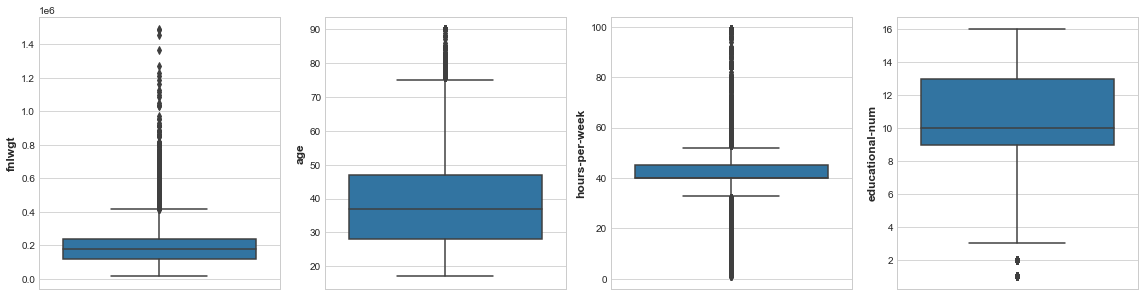

In [14]:
num_cols = df[['fnlwgt','age', 'hours-per-week', 'educational-num']]
# boxplots of numerical features for outlier detection

def box(df):
    fig = plt.figure(figsize=(16,16))
    for i in range(len(num_cols.columns)):
        fig.add_subplot(4, 4, i+1)
        sns.boxplot(y=num_cols.iloc[:,i])
    plt.tight_layout()
    plt.show()
box(num_cols)  

# EDA

# Distribution of the target variable

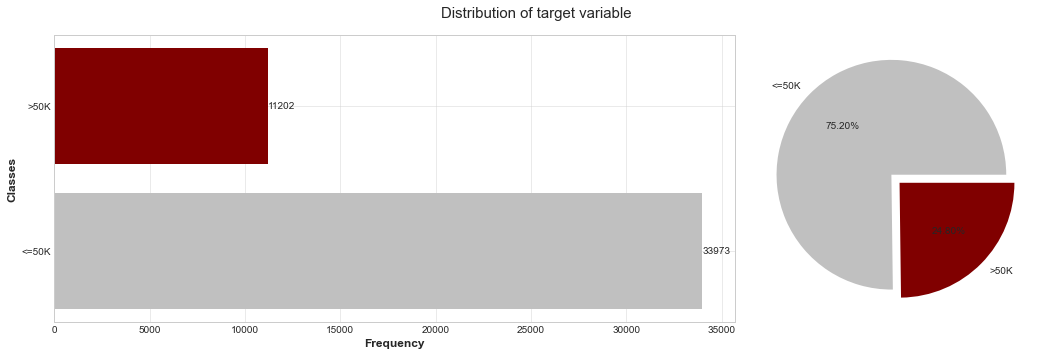

In [15]:
y = df['income'].value_counts()
colors = ["Silver","maroon" ]
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})


axes[0].barh(y=y.index, width=y.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Classes')
axes[0].grid(alpha=0.5)
for index, values in enumerate(y):
    axes[0].text(values+1, index, str(values), va='center')

axes[1].pie(y.values, labels=y.index, autopct='%.2f%%', explode=([0.05]*len(y.index)), colors=colors)

    

figure.suptitle('Distribution of target variable', fontsize=15)
plt.tight_layout(pad=1)
plt.show()


# Distribution of Categorical variables

In [16]:
print(categorical_variables)

['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income']


In [17]:
def plot_bar(df, cols):
    fig, axes = plt.subplots(2, 3, figsize=(10, 10), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        counts.plot.bar(ax = axes[i],color= "#4477DA")
        axes[i].set_title("Distibution of " + col)
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

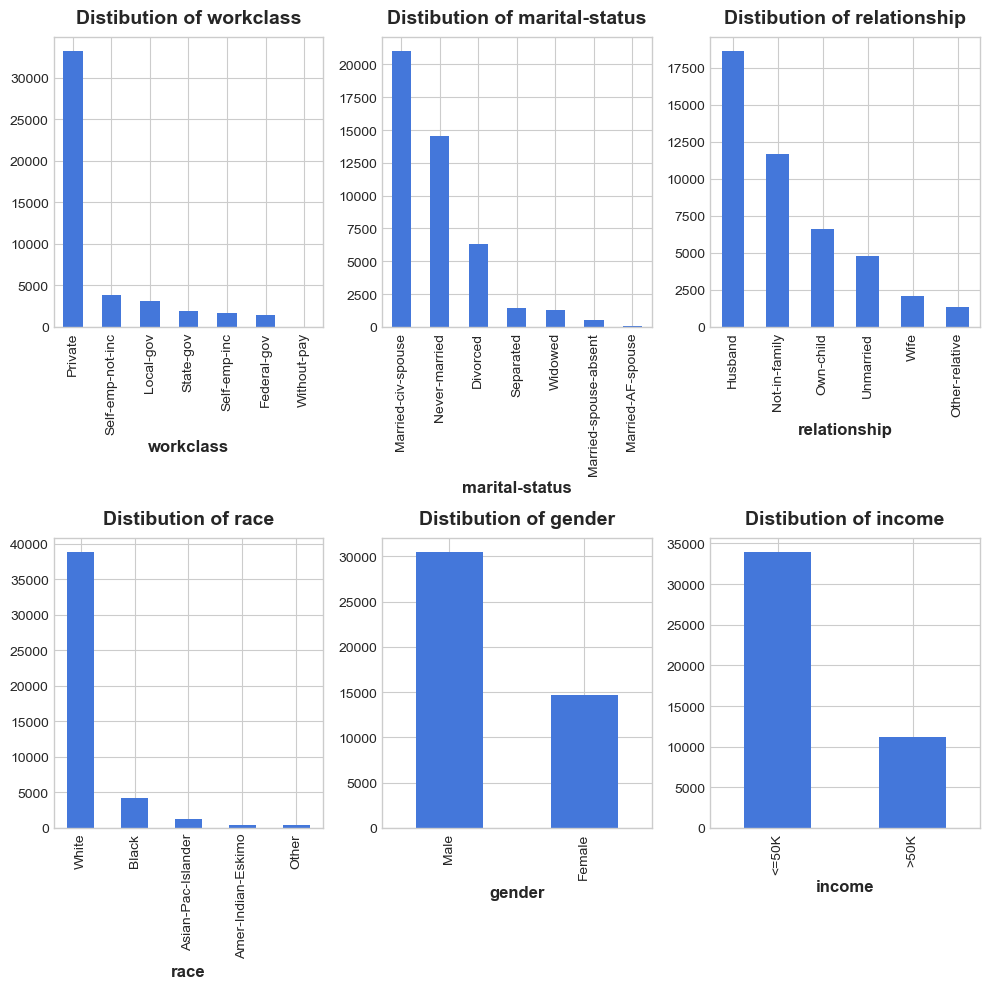

In [18]:
plot_bar(df, categorical_variables)

# Categorical variables and the target

In [19]:
cols =['workclass', 'marital-status', 'relationship', 'race', 'gender']

In [20]:
def create_plot_pivot(data2, x_column):
    _df_plot = data2.groupby([x_column, 'income']).size() \
    .reset_index().pivot(columns='income', index=x_column, values=0)
    return _df_plot

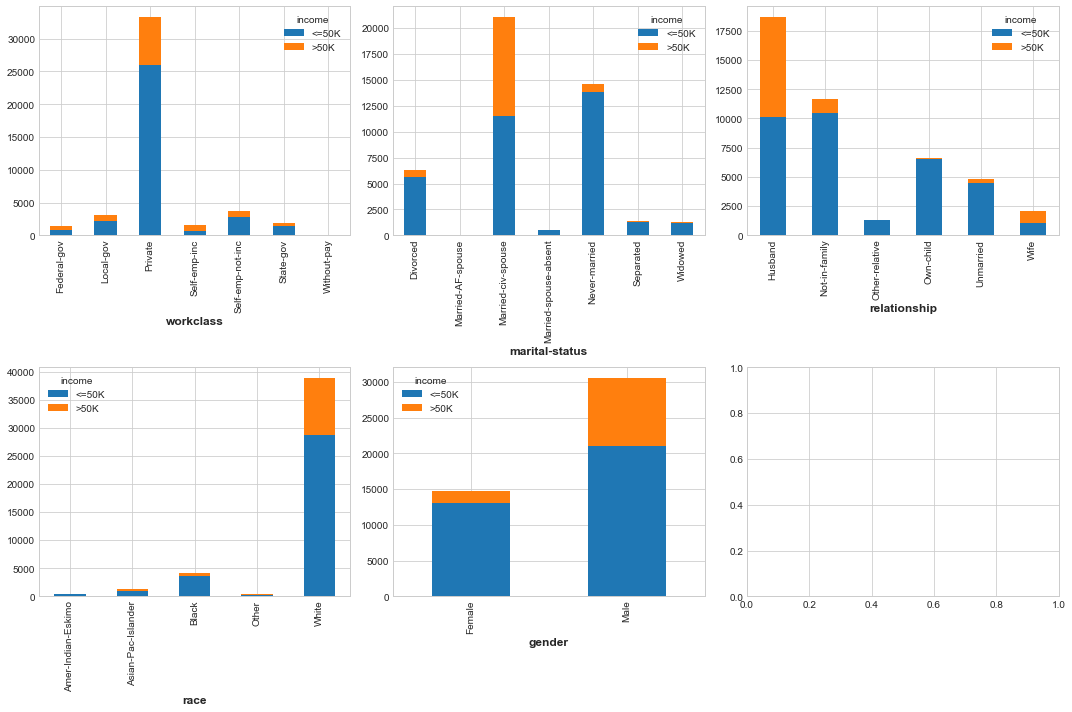

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

# Distribution of numeric variables

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

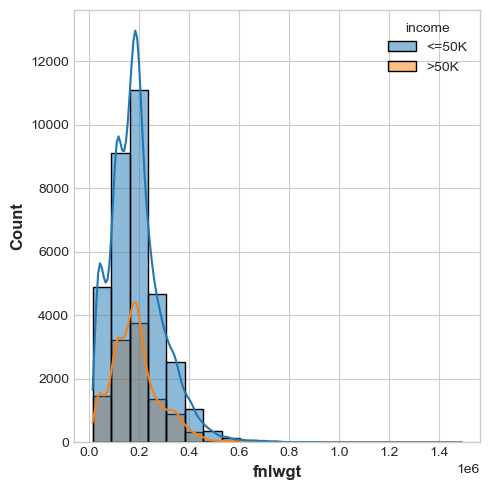

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df["fnlwgt"],
    hue = "income",
    kde = True,
    bins = 20
)

<AxesSubplot:xlabel='age', ylabel='Count'>

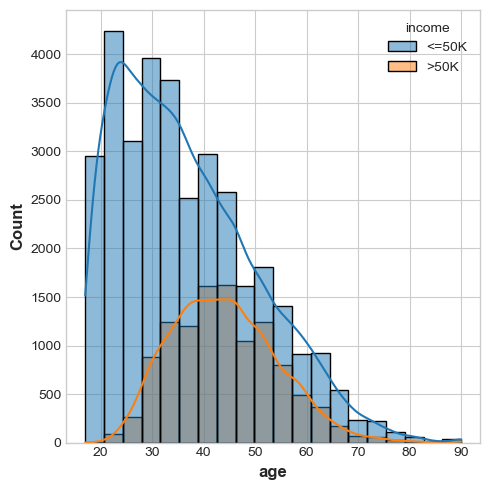

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df["age"],
    hue = "income",
    kde = True,
    bins = 20
)

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

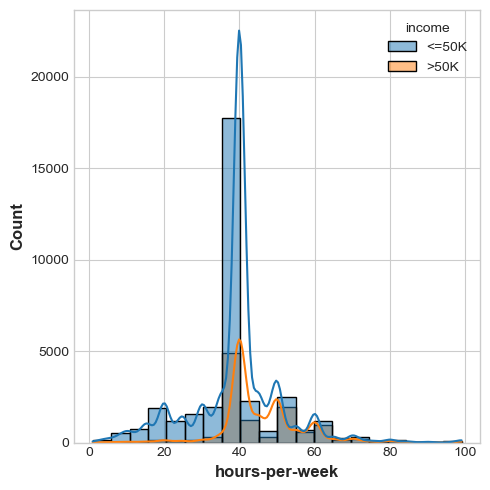

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df["hours-per-week"],
    hue = "income",
    kde = True,
    bins = 20
)

<AxesSubplot:xlabel='educational-num', ylabel='Count'>

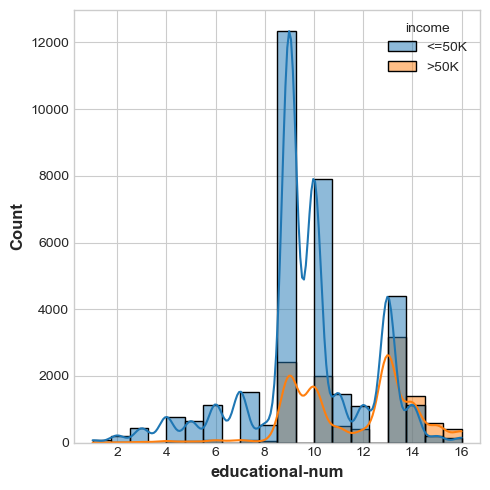

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df["educational-num"],
    hue = "income",
    kde = True,
    bins = 20
)

## Correlation

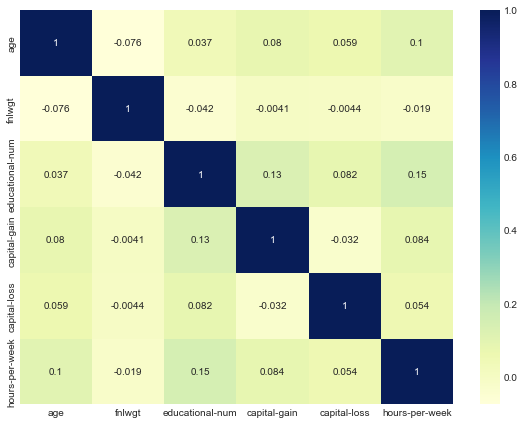

In [26]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

## Features Engeneering - combining the minority classes

In [27]:
df['marital-status'] = df['marital-status'].replace({"Married-civ-spouse":"Married", "Married-spouse-absent":"Married","Married-AF-spouse":"Married","Never-married" :"Single","Divorced":"Single", "Separated":"Single","Widowed":"Single"})
df['marital-status'].value_counts()

Single     23549
Married    21626
Name: marital-status, dtype: int64

In [28]:
df['workclass'] = df['workclass'].replace({"Self-emp-not-inc":"Self-emp", "Self-emp-inc":"Self-emp","Local-gov":"Gov","State-gov" :"Gov","Federal-gov":"Gov", "Without-pay":"Gov"})
df['workclass'].value_counts()

Private     33262
Gov          6473
Self-emp     5440
Name: workclass, dtype: int64

In [29]:
df['race'] = df['race'].replace({"White":1, "Black":2,"Asian-Pac-Islander":2,"Amer-Indian-Eskimo" :2,"Other":2})
df['race'].value_counts()

1    38859
2     6316
Name: race, dtype: int64

## Handling class imbalance using downsampling of the majority class teqnique

In [30]:
df['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [31]:
df_0 = df[df['income']=="<=50K"][:11681]
print("Shape: ", df_0.shape)
print("income classes values count: ", df_0['income'].value_counts())

Shape:  (11681, 15)
income classes values count:  <=50K    11681
Name: income, dtype: int64


In [32]:
df_1 = df[df['income'] == ">50K"][:11681]
print("Shape: ", df_1.shape)
print("income classes values count: ", df_1['income'].value_counts())

Shape:  (11202, 15)
income classes values count:  >50K    11202
Name: income, dtype: int64


In [33]:
df = pd.concat([df_0, df_1], axis=0)

## Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split


# Separate target from predictors
y = df.income
X = df.drop(['income'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

# Encoding

In [35]:
## Encoding the Target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)

In [36]:
object_cols =[]
for column in X_train.columns:
    if X_train[column].dtype == object:
        object_cols.append(column)
object_cols

['workclass', 'marital-status', 'relationship', 'gender']

In [37]:
from sklearn.preprocessing import OrdinalEncoder
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

## Features Engeneering - Features selection

## Features Utility Scores

In [38]:
discrete_features = X_train.dtypes == int

In [39]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X_train,y_train,discrete_features):
    mi_scores = mutual_info_classif(X_train,y_train,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X_train.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(X_train,y_train,discrete_features) 
mi_scores

relationship       0.158776
marital-status     0.142320
age                0.095997
capital-gain       0.087100
educational-num    0.078788
hours-per-week     0.045912
fnlwgt             0.042739
capital-loss       0.037805
gender             0.034969
workclass          0.007051
race               0.004203
Name: MI Scores, dtype: float64

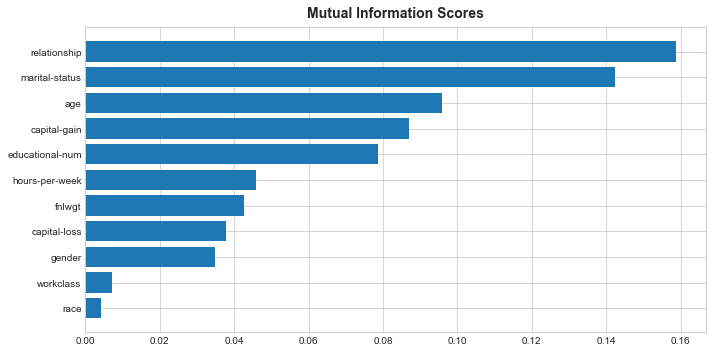

In [40]:
def plot_mi_scores(scores):
    fig, ax = plt.subplots(figsize=(10,5))
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plot_mi_scores(mi_scores)

# Features scaling

In [41]:
# X_train Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(df_scaled, columns = X_train.columns)
X_train.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
workclass,18306.0,0.0,1.0,-1.812,0.031,0.031,0.031,1.874
marital-status,18306.0,0.0,1.0,-0.813,-0.813,-0.813,1.229,1.229
relationship,18306.0,0.0,1.0,-0.731,-0.731,-0.731,0.507,2.364
gender,18306.0,-0.0,1.0,-1.649,-1.649,0.606,0.606,0.606
age,18306.0,-0.0,1.0,-1.848,-0.743,-0.033,0.677,3.913
fnlwgt,18306.0,-0.0,1.0,-1.671,-0.683,-0.113,0.451,12.386
educational-num,18306.0,0.0,1.0,-3.686,-0.612,-0.228,0.925,2.078
race,18306.0,-0.0,1.0,-0.378,-0.378,-0.378,-0.378,2.644
capital-gain,18306.0,-0.0,1.0,-0.196,-0.196,-0.196,-0.196,9.490
capital-loss,18306.0,-0.0,1.0,-0.258,-0.258,-0.258,-0.258,7.596


In [42]:
# X_valid Scaling
df_scaled = scaler.transform(X_valid)
X_valid = pd.DataFrame(df_scaled, columns = X_valid.columns)
X_valid.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
workclass,4577.0,0.025,1.001,-1.812,0.031,0.031,0.031,1.874
marital-status,4577.0,0.015,1.003,-0.813,-0.813,-0.813,1.229,1.229
relationship,4577.0,-0.000,0.995,-0.731,-0.731,-0.731,0.507,2.364
gender,4577.0,0.006,0.997,-1.649,-1.649,0.606,0.606,0.606
age,4577.0,0.007,1.008,-1.848,-0.743,-0.033,0.677,3.913
fnlwgt,4577.0,0.009,0.993,-1.610,-0.677,-0.106,0.469,7.277
educational-num,4577.0,0.010,0.983,-3.686,-0.612,-0.228,0.925,2.078
race,4577.0,-0.029,0.966,-0.378,-0.378,-0.378,-0.378,2.644
capital-gain,4577.0,0.006,1.049,-0.196,-0.196,-0.196,-0.196,9.490
capital-loss,4577.0,-0.005,0.981,-0.258,-0.258,-0.258,-0.258,6.000


## Helping functions

### Plotting Confusion Matrix and Classification Report

In [43]:
from sklearn import metrics

def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_valid, y_pred,normalize='true')
    cr = pd.DataFrame(metrics.classification_report(y_valid, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu', ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=20)
    ax[0].xaxis.set_ticklabels(['<= 50 K','> 50 k'])
    ax[0].yaxis.set_ticklabels(['<= 50 K','> 50 k'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='YlGnBu', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=20)
    plt.show()

### Plotting roc_curve

In [44]:
from sklearn.metrics import roc_curve, auc

def roc(model,y_pred):
    # Predict the probabilities of the positive class
    y_pred = model.predict_proba(X_valid)[:,1]
    y_pred.shape

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

    # Calculate the AUC score
    auc_score = auc(fpr, tpr)
    x1=np.linspace(0,1,100)
    # Plot the ROC curve
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
    plt.plot(x1,x1,label='baseline')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve for binary classification")
    plt.legend()
    plt.show()

## Modelling

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score

## GaussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_val_pred1 =model.predict(X_valid)

In [47]:
print(f'Precision: {precision_score(y_valid, y_val_pred1)}')
print(f'Recall: {recall_score(y_valid, y_val_pred1)}')
print(f'F1-Score: {f1_score(y_valid, y_val_pred1)}')
print(f'AUROC: {roc_auc_score(y_valid, y_val_pred1)}')

Precision: 0.8468118195956454
Recall: 0.4959016393442623
F1-Score: 0.6255025847214245
AUROC: 0.7065816470555836


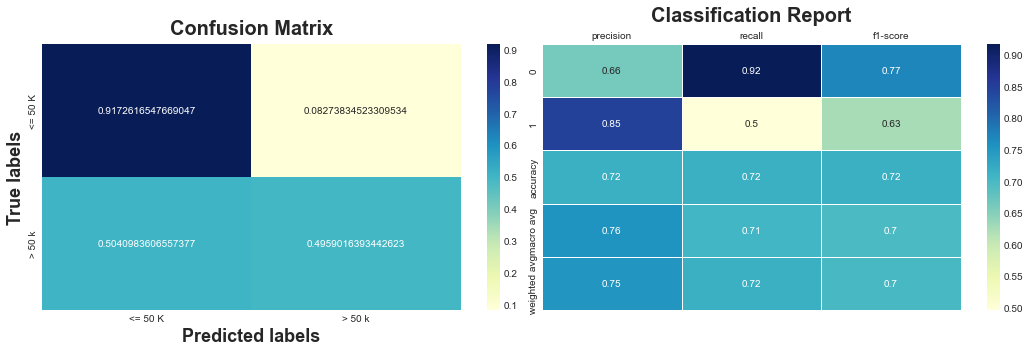

In [48]:
clf_plot(y_val_pred1)

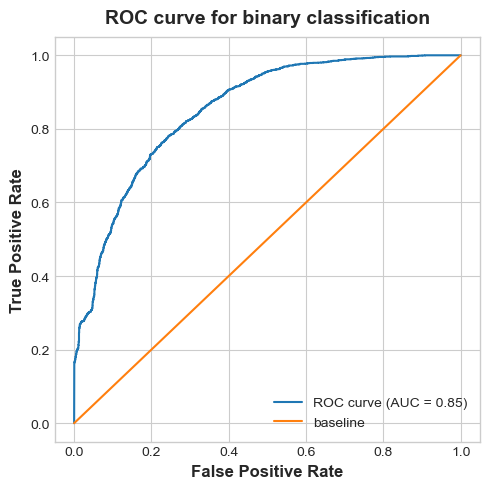

In [49]:
roc(model,y_val_pred1)

## Logistic Regression

In [50]:
# Train Log Regression
lr = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_val_pred2 = lr.predict(X_valid)
print(f'Precision: {precision_score(y_valid, y_val_pred2)}')
print(f'Recall: {recall_score(y_valid, y_val_pred2)}')
print(f'F1-Score: {f1_score(y_valid, y_val_pred2)}')
print(f'AUROC: {roc_auc_score(y_valid, y_val_pred2)}')

Precision: 0.7707442258340462
Recall: 0.8205828779599271
F1-Score: 0.7948831054256728
AUROC: 0.7977336901349404


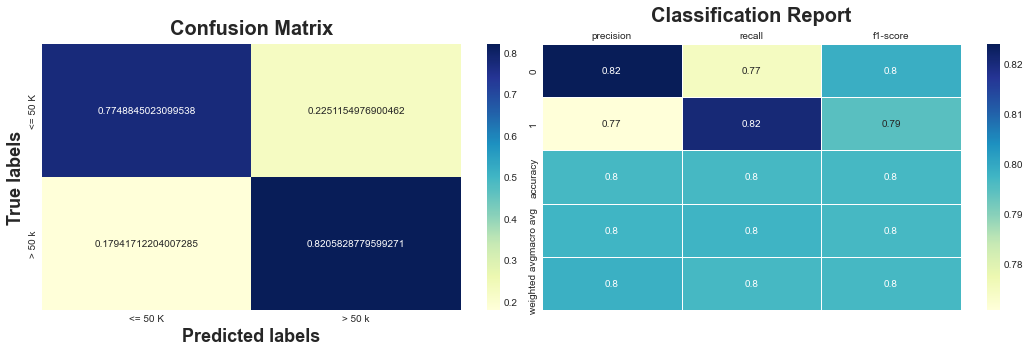

In [51]:
clf_plot(y_val_pred2)

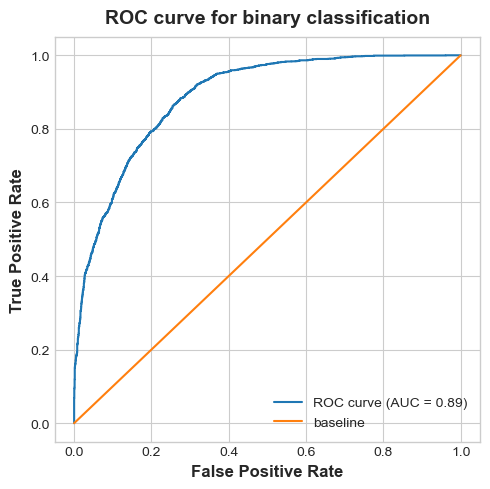

In [52]:
roc(lr,y_val_pred2)

## RFC

In [53]:
rfc = RandomForestClassifier(max_depth=15).fit(X_train, y_train)
y_val_pred3 = rfc.predict(X_valid)
print(f'Precision: {precision_score(y_valid, y_val_pred3)}')
print(f'Recall: {recall_score(y_valid, y_val_pred3)}')
print(f'F1-Score: {f1_score(y_valid, y_val_pred3)}')
print(f'AUROC: {roc_auc_score(y_valid, y_val_pred3)}')

Precision: 0.7812371978697256
Recall: 0.8683970856102003
F1-Score: 0.8225145568255336
AUROC: 0.8220607855602451


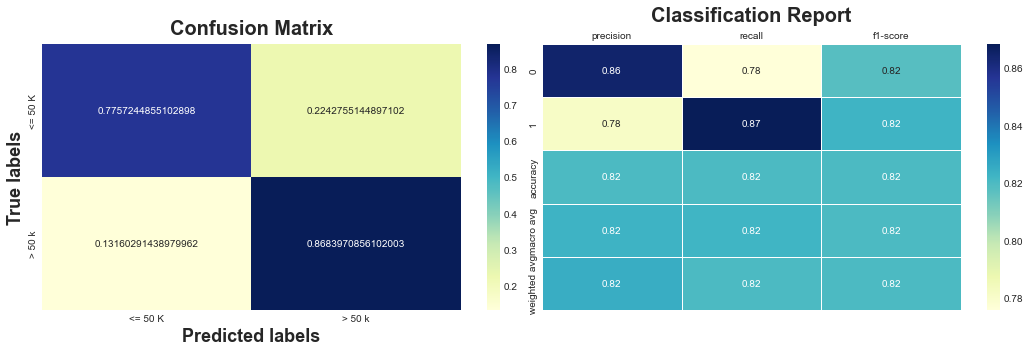

In [54]:
clf_plot(y_val_pred3)

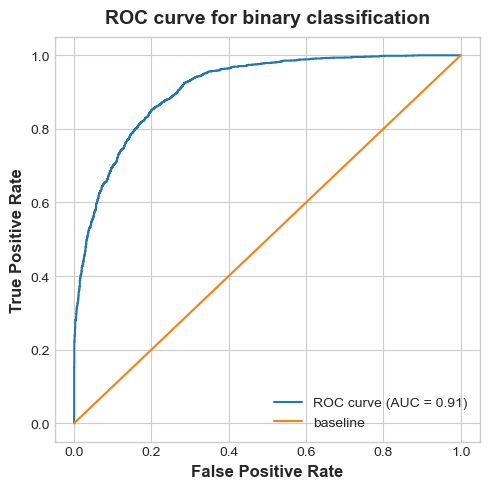

In [55]:
roc(rfc,y_val_pred3)

## KNN

In [56]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
y_val_pred4 = knn.predict(X_valid)
print(f'Precision: {precision_score(y_valid, y_val_pred4)}')
print(f'Recall: {recall_score(y_valid, y_val_pred4)}')
print(f'F1-Score: {f1_score(y_valid, y_val_pred4)}')
print(f'AUROC: {roc_auc_score(y_valid, y_val_pred4)}')

Precision: 0.7529812606473595
Recall: 0.8051001821493625
F1-Score: 0.7781690140845071
AUROC: 0.7807525270259623


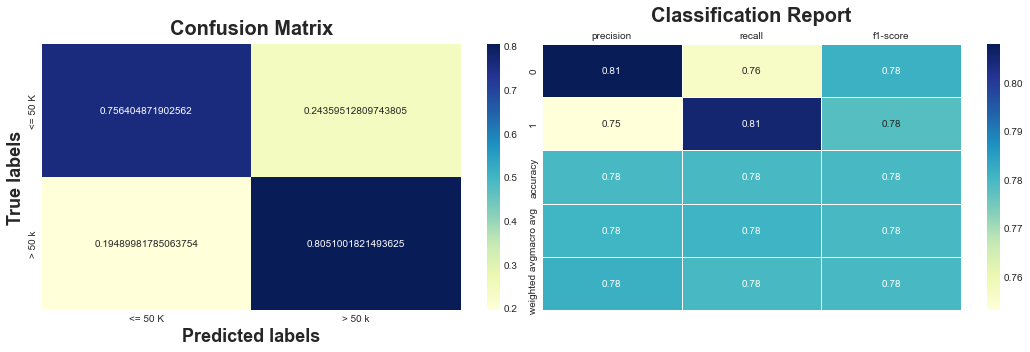

In [57]:
clf_plot(y_val_pred4)

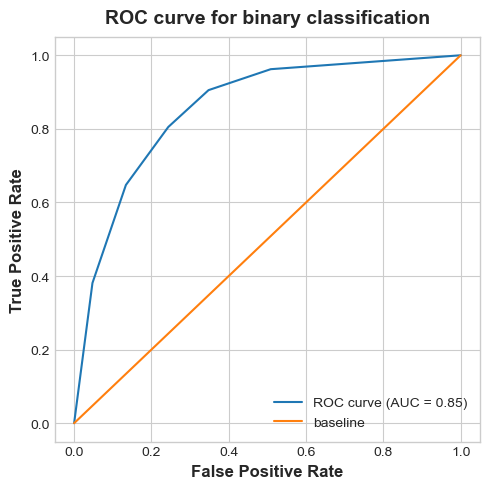

In [58]:
roc(knn,y_val_pred4)

## Conclusion

### Comparing models performance

In [59]:
def measure_error(y_valid, y_val_pred, label):
    return pd.Series({"Accuracy": accuracy_score(y_valid, y_val_pred),
                     "Precision": precision_score(y_valid, y_val_pred),
                     "Recall": recall_score(y_valid, y_val_pred),
                     "F1": f1_score(y_valid, y_val_pred),
                     "AUROC": roc_auc_score(y_valid, y_val_pred)}, 
                     name = label)

In [60]:
GaussianNB = pd.concat([measure_error(y_valid, y_val_pred1,"GaussianNB")],axis = 1)
Log_reg = pd.concat([measure_error(y_valid, y_val_pred2,"Log_reg")],axis = 1)
RFC = pd.concat([measure_error(y_valid, y_val_pred3,"RFC")],axis = 1)
KNN = pd.concat([measure_error(y_valid, y_val_pred4,"KNN")],axis = 1)

In [61]:
compare_models =  pd.concat([GaussianNB,Log_reg,RFC,KNN],axis =1)
compare_models.style.background_gradient(cmap='Blues')

,GaussianNB,Log_reg,RFC,KNN
Accuracy,0.715097,0.796810,0.820188,0.779768
Precision,0.846812,0.770744,0.781237,0.752981
Recall,0.495902,0.820583,0.868397,0.805100
F1,0.625503,0.794883,0.822515,0.778169
AUROC,0.706582,0.797734,0.822061,0.780753


## Result :

### Based on the above output, best algorithm base on F1 Score is : Random Forest Classifier

## Optimizing the best model performance

In [62]:
from sklearn.model_selection import GridSearchCV
# create a Random Forest Classifier
forest = RandomForestClassifier(class_weight='balanced_subsample',random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest_selected = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.8252485085311081


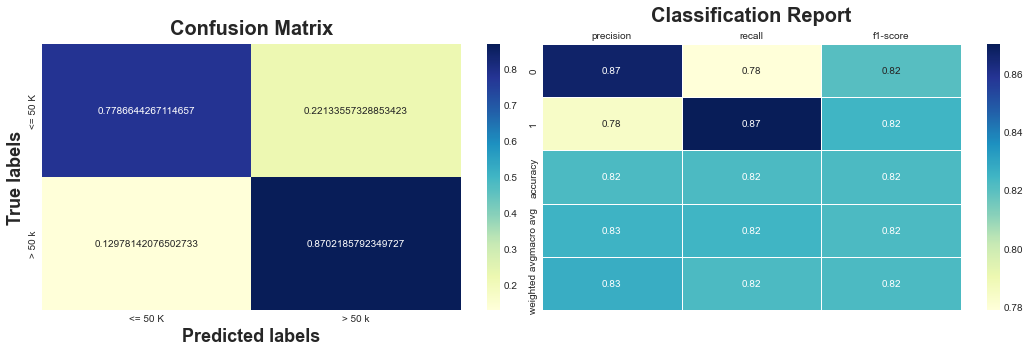

In [63]:
yhat_train = best_forest_selected.predict(X_train)
yhat_test = best_forest_selected.predict(X_valid)
clf_plot(yhat_test)

## Features importance according to the best model

In [64]:
scores= best_forest_selected.feature_importances_
scores = pd.DataFrame(scores)
df_columns = pd.DataFrame(X_train.columns)

In [65]:
f_Scores = pd.concat([df_columns,scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']
f_Scores = f_Scores.nlargest(20,'Score')
f_Scores

,Feature,Score
1,marital-status,0.193984
2,relationship,0.173067
6,educational-num,0.166308
4,age,0.140762
8,capital-gain,0.121024
5,fnlwgt,0.069448
10,hours-per-week,0.068409
9,capital-loss,0.029681
3,gender,0.019405
0,workclass,0.012719


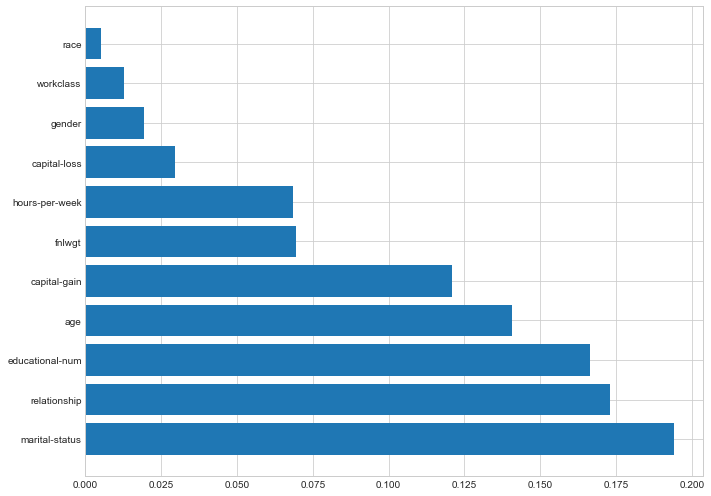

In [66]:
x = np.array(f_Scores["Feature"])
y = np.array(f_Scores["Score"])
plt.figure(figsize=(10, 7))
plt.barh(x,y, height = 0.8)
plt.show()

---
# END
Thank you :)